In [1]:
from madigan.environments import make_env
from madigan.utils.preprocessor import StackerDiscrete
from madigan.utils.config import make_config

import numpy as np
import matplotlib.pyplot as plt

In [2]:
config_sine = make_config("sineComp", assets=["sineC1"],
                          data_source_type="SineAdder",
                          data_source_config={
                            'freq':[2.2, 4.1, 1., 3.],
                            'mu':[.6, 0.3, 2., 4.2],
                            'amp':[.5, 0.2, 0.4, 1.2],
                            'phase':[0., 1., 4., 0.],
                            'dX':0.01,
                            "noise": 0.0},
                         )
env_sine = make_env(config_sine)


In [38]:
config_sine_dyn = make_config("sineComp", assets=["sineC1"],
                          data_source_type="SineDynamic",
                          data_source_config={
#                            'freqRange':[[1, 40., 1], [1, 20., 2], [.01, .02, .1]],
#                            'muRange':[[2, 10., .2], [4., 8., 1], [2., 5., .1]],
#                            'ampRange':[[2, 10., .1], [3, 9, 1], [2., 3., .01]],
#                             'phase':[0., 0., 0.],
                            'freqRange':[[.1, 40., 1], [.1, 10., 0.1]],
                            'muRange':[[2, 10., .2], [4., 8., 1]],
                            'ampRange':[[2, 10., .1], [3, 9, 1]],
                            'phase':[0., 0.],
                            'dX':0.01,
                            "noise": 1},
                         )
env_sine_dyn = make_env(config_sine_dyn)

In [39]:
env_sine.nAssets, env_sine_dyn.nAssets

(1, 1)

In [57]:
window_sine = StackerDiscrete(128)
window_sine.initialize_history(env_sine)
window_sine_dyn = StackerDiscrete(512)
window_sine_dyn.initialize_history(env_sine_dyn)

Text(0.5, 1.0, 'Sine Dynamic')

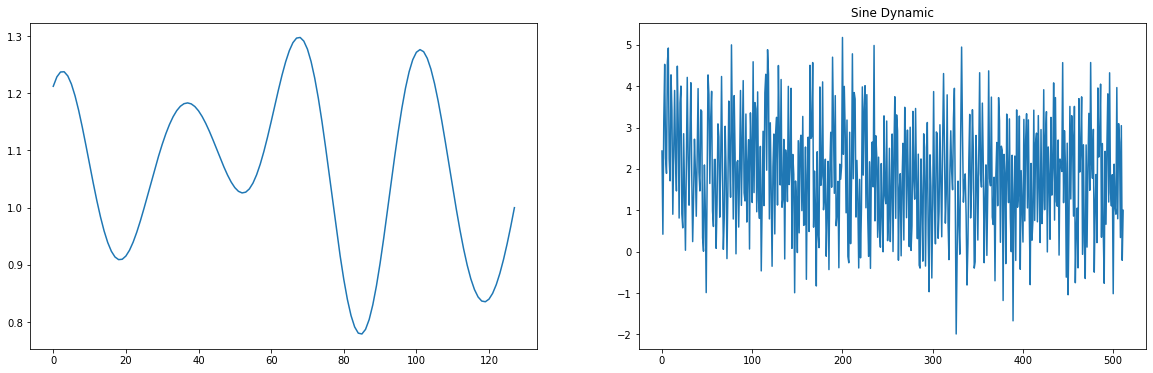

In [58]:
window_sine.reset_state()
window_sine.initialize_history(env_sine)
window_sine_dyn.reset_state()
window_sine_dyn.initialize_history(env_sine_dyn)

fig, ax = plt.subplots(1,2, figsize=(20, 6))
ax[0].plot(window_sine.current_data().price, label='sine')
ax[1].plot(window_sine_dyn.current_data().price, label='sine_dyn')
ax[1].set_title('Sine Dynamic')


In [468]:
sine_dyn = env_sine_dyn.dataSource
[sine_dyn.getProcess(0) for i in range(1000)]

[0.8765526014325935,
 -0.32974871101860304,
 -0.4016054543353017,
 0.9191810032720421,
 -0.9316190739689657,
 0.4416230141120289,
 0.2825447807655398,
 -0.8498137228481254,
 0.955977623565354,
 -0.5454384857348948,
 -0.1600860824087118,
 0.7804464424242089,
 -0.9803361731617424,
 0.649253957357762,
 0.03762738405188214,
 -0.7110791620002924,
 0.9953052772418695,
 -0.7378180405847606,
 0.08483131430494613,
 0.6092363975810338,
 -0.9709467276454812,
 0.8071853210086769,
 -0.20729001266177416,
 -0.5054209259581681,
 0.9465881780490929,
 -0.8765526014325937,
 0.3297487110186038,
 0.40160545433530065,
 -0.919181003272042,
 0.9316190739689657,
 -0.44162301411202826,
 -0.28254478076554085,
 0.8498137228481255,
 -0.955977623565354,
 0.5454384857348955,
 0.16008608240871097,
 -0.7804464424242089,
 0.9803361731617423,
 -0.6492539573577615,
 -0.03762738405188276,
 0.7110791620002923,
 -0.9953052772418693,
 0.7378180405847611,
 -0.0848313143049467,
 -0.6092363975810334,
 0.9709467276454812,
 -0.80

In [1]:
window_sine_dyn.current_data().price

NameError: name 'window_sine_dyn' is not defined

In [8]:
data = window_ou.current_data().price
def ewm(data, alpha=0.99):
    curr = data[0]
    out = [curr]
    for dat in data[1:]:
        curr = (1-alpha)*curr + alpha*dat
        out.append(curr)
    return np.array(out)
        
plt.plot(data)
plt.plot(ewm(data, alpha=.1))


NameError: name 'window_ou' is not defined

In [8]:
window_trend_ou.current_data().price, env_trend_ou.currentPrices

NameError: name 'window_trend_ou' is not defined

In [76]:
import numba

@numba.njit
def trend_ou():
    x = 0.
    y = 1
    ema = y
    dx = 0.01
    dy = 0.001
    theta = 1
    phi = .5
    noise_var = 0.01
    emaAlpha = 0.9
    
    trending = False
    directions = np.array((-1, 1))
    current_direction = directions[1]
    noise = 0.05
    trend_len=0
    prev_y = y
    ou_noise = 0.
    ou_process = 0.
    while True:
#         prev_y = y
#         ema = emaAlpha*y + (1-emaAlpha)*ema
        if trending:
            y += y*dy*current_direction +  y*np.random.normal(0, noise_var)
            y = max(0.01, y)
            trend_len -= 1
            if trend_len == 0:
                trending=False
                prev_y = y
            if y <= 0.01:
                current_direction = 1
            
        else:
            ou_noise = y*phi*np.random.normal(0, noise)
            ou_process = theta*(prev_y-y)
#             print(ou_noise, ou_process, ou_noise+ou_process, y, prev_y)
            y += ou_process + ou_noise
            if np.random.random() < 0.001:
                trending = True
                current_direction = np.random.choice(directions)
                trend_len = np.random.randint(low=500, high=1500)
#         y += y * noise * np.random.normal(0., noise)
#         ou_noise = y*phi*np.random.normal(0, noise)
# #         ou_process = theta*((y+ou_noise)-y)
#         ou_process = theta*(y+ou_noise-prev_y)
#         ou_process = 0.
        trend_process = y
#         y += ou_process + ou_noise
        yield y, ema, ou_process, trend_process, prev_y, ou_noise
        

In [77]:
synth = iter(trend_ou())

Text(0.5, 1.0, 'ou process')

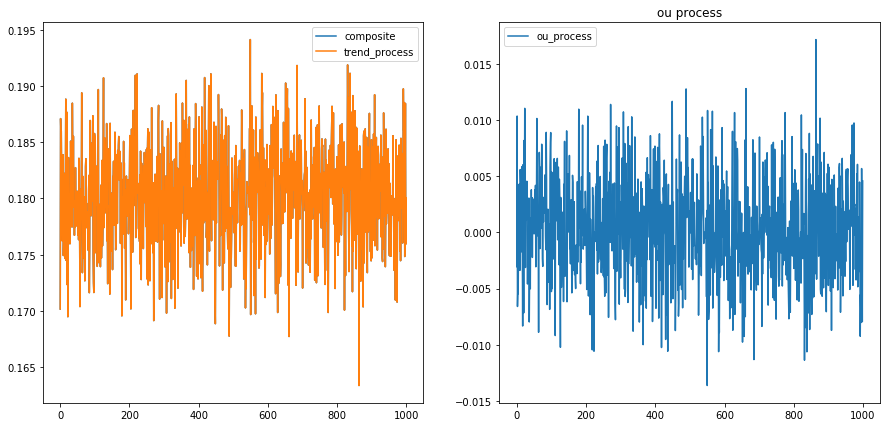

In [85]:
data = []
for i in range(1000):
    data.append(next(synth))
    
data = np.array(data)
fig, ax = plt.subplots(1, 2, figsize=(15, 7))
ax[0].plot(data[:, 0], label="composite")
# ax[0].plot(data[:, 1], label="ema")
ax[0].plot(data[:, 3], label="trend_process")
# ax[0].plot(data[:, 4], label="prev_y")
ax[1].plot(data[:, 2], label="ou_process")
# ax[1].plot(data[:, 5], label="ou_noise")
ax[0].legend()
ax[1].legend()
ax[1].set_title('ou process')